In [3]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
df_energy_2020 = pd.read_csv('../../../data/prepared/df_energy_2020.csv')

## Exponential Smoothing
Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic tred or seasonal component.
The model of exponential smoothing uses explicitly an exponentially DECREASING weight for past observations.

Types:
- Simple Exponential Smoothing
    for univariate data WITHOUT trend and seasonality
- Double Exponential Smoothing
    support for trends (additive and multiplicative trend)
- Triple Exponential Smoothing
    supports for trends and seasonality


In [5]:
# prepare series for exponential smoothing
sr_exp_smoothing_2020 = df_energy_2020.copy()
sr_exp_smoothing_2020['datetime'] = pd.to_datetime(sr_exp_smoothing_2020['datetime'])
sr_exp_smoothing_2020.set_index('datetime', inplace=True)
sr_exp_smoothing_2020 = sr_exp_smoothing_2020['energy_price']
# resample the data - take day as unit(use mean value)
sr_exp_smoothing_2020 = sr_exp_smoothing_2020.resample(rule='D').mean()

<AxesSubplot: xlabel='datetime'>

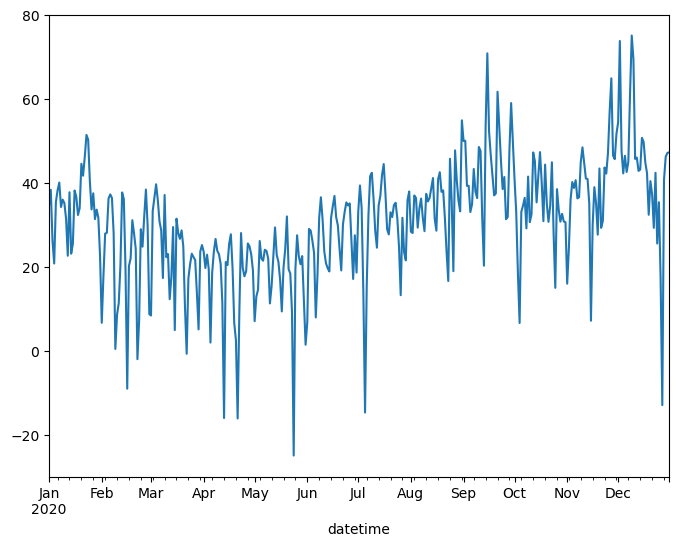

In [6]:
# set figure size
rcParams['figure.figsize'] = 8,6
# plot
sr_exp_smoothing_2020.plot()

In [7]:
fit1 = SimpleExpSmoothing(sr_exp_smoothing_2020, initialization_method='heuristic').fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(7).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(sr_exp_smoothing_2020, initialization_method='heuristic').fit(smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(7).rename(r'$\alpha=0.6$')


fit3 = SimpleExpSmoothing(sr_exp_smoothing_2020, initialization_method='estimated').fit()
fcast3 = fit3.forecast(7).rename(r'$\alpha=%s$' % fit3.model.params['smoothing_level'])

# smoothing_level(alpha): the smoothing coefficient for the level. This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1

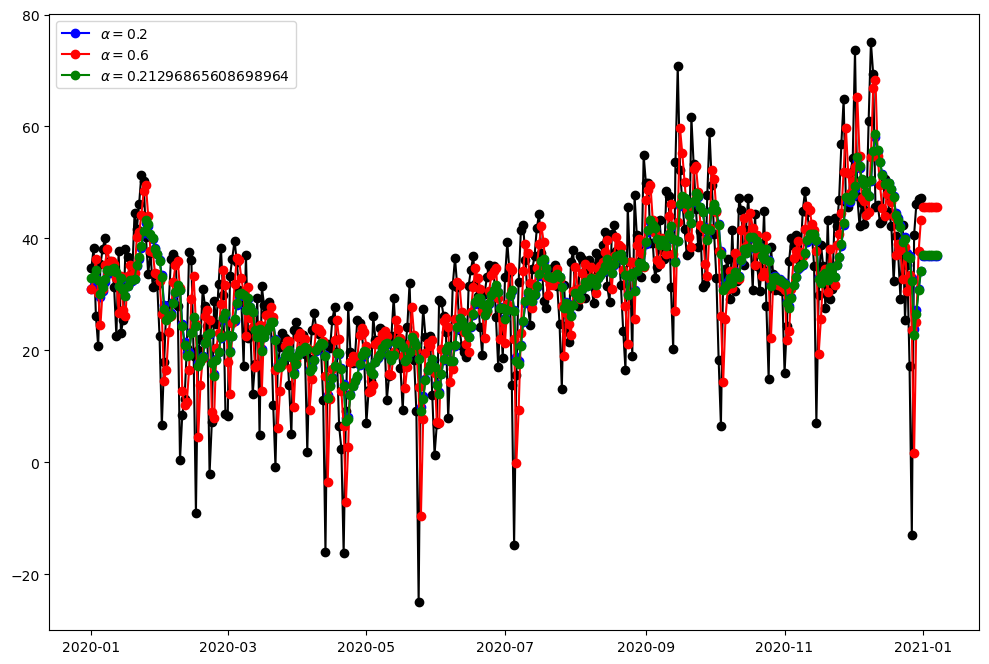

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(sr_exp_smoothing_2020, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
(line1, ) = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
(line2, ) = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
(line3, ) = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

smoothing level 0.6 is fitting at most -> Take this parameter??